In [662]:
#Importing library

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [663]:
# Load the datase
df = pd.read_csv("data_science_student_marks.csv")

In [664]:

print(df.head())

   student_id location  age  sql_marks  excel_marks  python_marks  \
0           4   Sydney   24         95           99            87   
1           5    Tokyo   24         99           95            89   
2           6   Berlin   22         72           70            99   
3           7   London   23         97           90            74   
4           8    Tokyo   22         91           71            79   

   power_bi_marks  english_marks address financial_status  \
0              82             75   Urban     Middle Class   
1              86             82   Urban      Upper Class   
2              79             77   Urban     Middle Class   
3              72             85   Urban     Middle Class   
4              80             75   Urban      Lower Class   

  international_student  
0                   Yes  
1                   Yes  
2                   Yes  
3                   Yes  
4                   Yes  


In [665]:
# Data Processing
print("\nData Processing:")
# Check for missing values
print("Missing values:\n", df.isnull().sum())


Data Processing:
Missing values:
 student_id               0
location                 0
age                      0
sql_marks                0
excel_marks              0
python_marks             0
power_bi_marks           0
english_marks            0
address                  0
financial_status         0
international_student    0
dtype: int64


In [666]:
# Check for data types
print("\nData types:\n", df.dtypes)




Data types:
 student_id                int64
location                 object
age                       int64
sql_marks                 int64
excel_marks               int64
python_marks              int64
power_bi_marks            int64
english_marks             int64
address                  object
financial_status         object
international_student    object
dtype: object


In [667]:
# Explore unique values in categorical columns
print("\nUnique values in 'location':", df['location'].unique())


Unique values in 'location': ['Sydney' 'Tokyo' 'Berlin' 'London' 'Toronto' 'Melbourne' 'Paris'
 'Los Angeles' 'New York']


In [668]:
# Exploratory Data Analysis (EDA)
# Summary statistics
print("\nSummary statistics:")
print(df.describe())



Summary statistics:
       student_id         age   sql_marks  excel_marks  python_marks  \
count  497.000000  497.000000  497.000000   497.000000    497.000000   
mean   252.000000   21.380282   84.661972    85.384306     85.388330   
std    143.615807    2.205714    8.745415     8.782497      8.878668   
min      4.000000   18.000000   70.000000    70.000000     70.000000   
25%    128.000000   20.000000   78.000000    78.000000     77.000000   
50%    252.000000   21.000000   85.000000    86.000000     86.000000   
75%    376.000000   23.000000   92.000000    93.000000     94.000000   
max    500.000000   25.000000  100.000000   100.000000    100.000000   

       power_bi_marks  english_marks  
count      497.000000     497.000000  
mean        84.545272      84.824950  
std          8.903066       9.060479  
min         70.000000      70.000000  
25%         77.000000      77.000000  
50%         84.000000      85.000000  
75%         92.000000      93.000000  
max        100.000

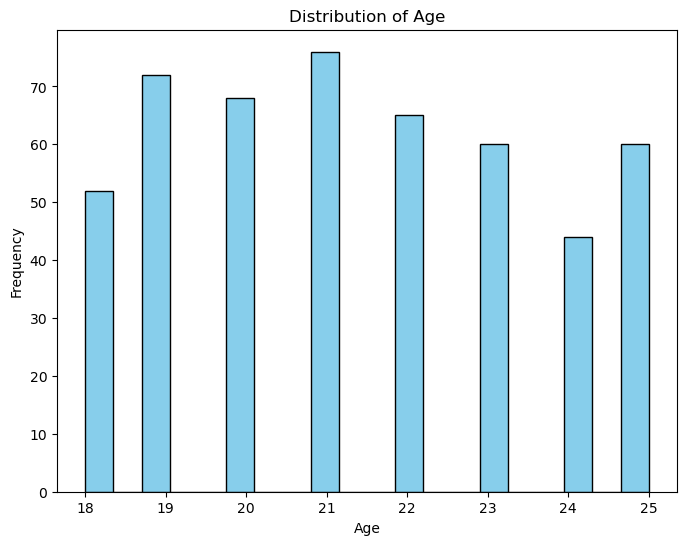

In [669]:
# Visualize the distribution of age
plt.figure(figsize=(8, 6))
plt.hist(df['age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

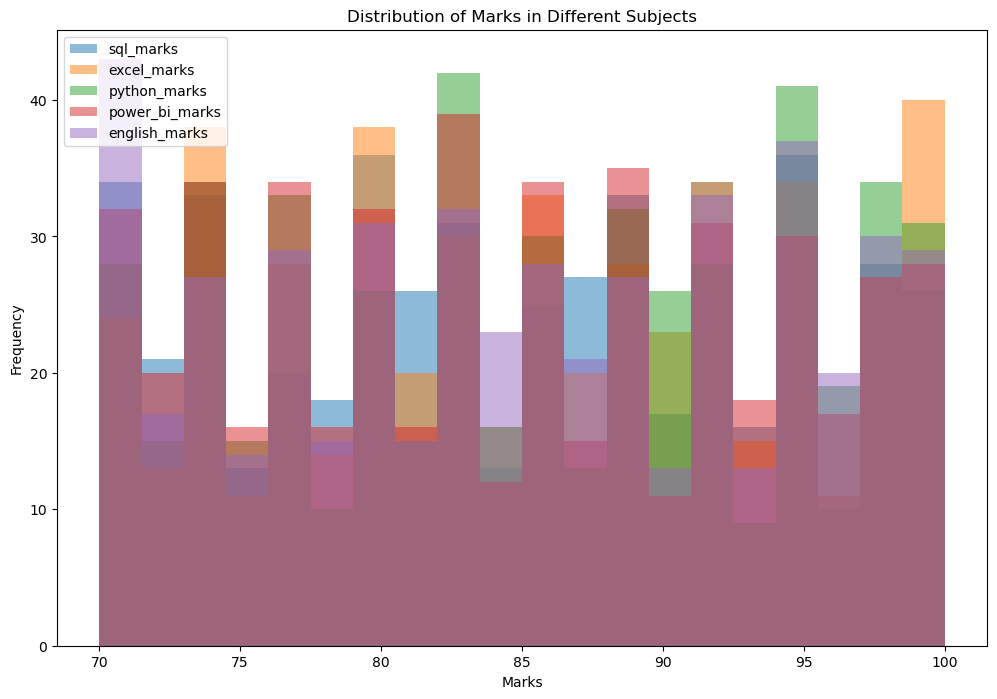

In [670]:
# Visualize the distribution of marks in different subjects
subjects = ['sql_marks', 'excel_marks', 'python_marks', 'power_bi_marks', 'english_marks']

plt.figure(figsize=(12, 8))
for subject in subjects:
    plt.hist(df[subject], bins=20, alpha=0.5, label=subject)

plt.title('Distribution of Marks in Different Subjects')
plt.xlabel('Marks')
plt.ylabel('Frequency')
plt.legend()
plt.show()

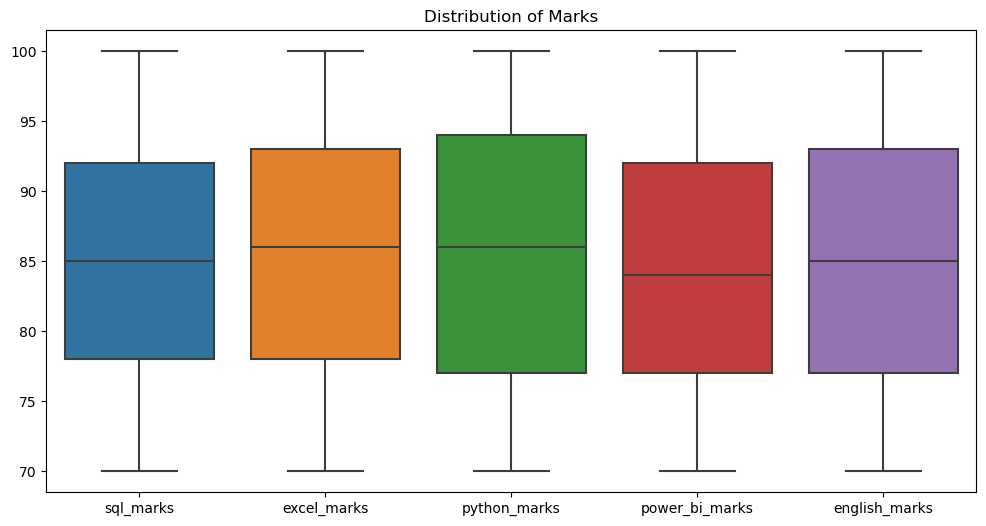

In [671]:
# Distribution of marks
plt.figure(figsize=(12, 6))
sns.boxplot(data=df.iloc[:, 3:])  # Considering columns from 'sql_marks' onwards
plt.title("Distribution of Marks")
plt.show()

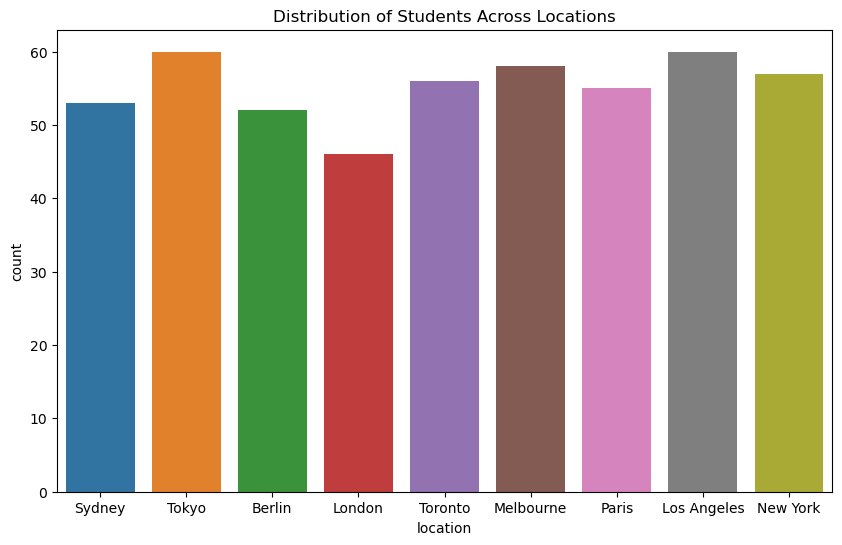

In [672]:
# Demographic Analysis
# Distribution of students across different locations
plt.figure(figsize=(10, 6))
sns.countplot(x='location', data=df)
plt.title("Distribution of Students Across Locations")
plt.show()

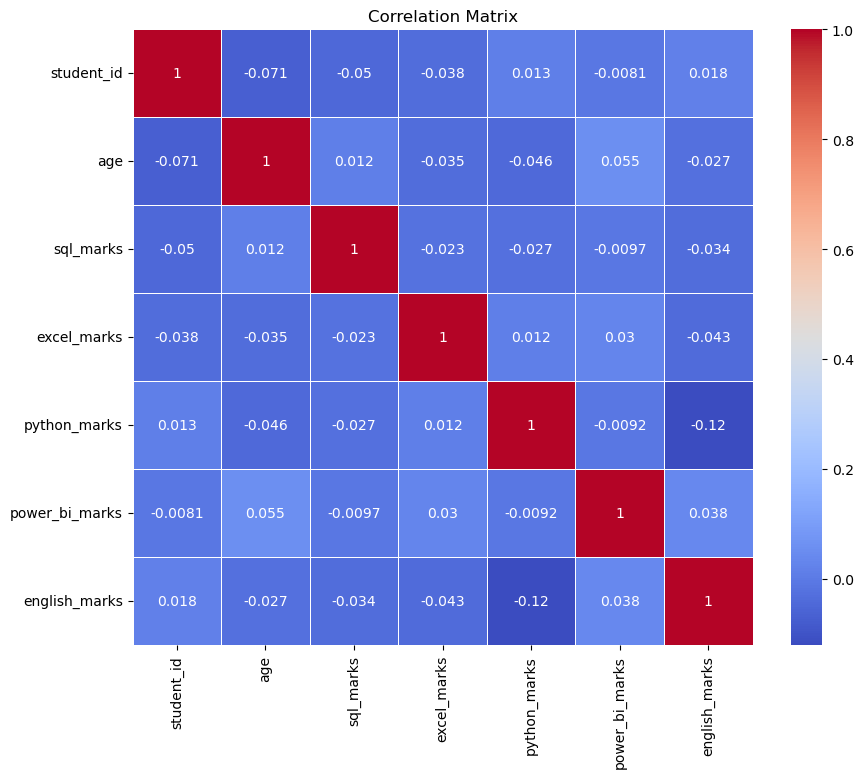

In [673]:
# Correlation matrix (excluding non-numeric columns)
numeric_columns = df.select_dtypes(include=[np.number]).columns
correlation_matrix = df[numeric_columns].corr()

# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title("Correlation Matrix")
plt.show()

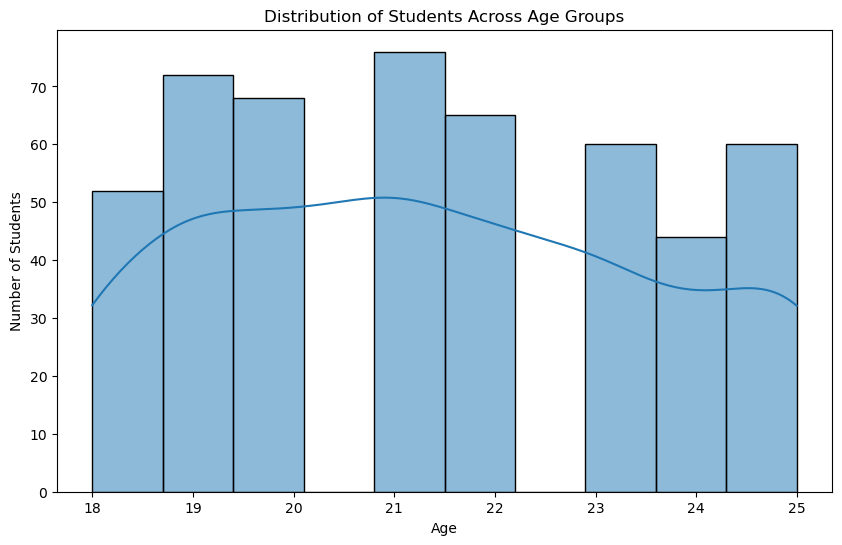

In [674]:
# Analyze the distribution of students across age groups
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=10, kde=True)
plt.title('Distribution of Students Across Age Groups')
plt.xlabel('Age')
plt.ylabel('Number of Students')
plt.show()

# Bias Identification and Fairness Analysis:

In [675]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing


In [676]:

features = ['sql_marks', 'excel_marks', 'python_marks', 'power_bi_marks', 'english_marks']


In [677]:
df['performance_label'] = pd.cut(df[features].mean(axis=1), bins=[70, 80, 90, 100], labels=['Low', 'Medium', 'High'])

In [678]:
print("Distribution of classes in performance_label:")
print(df['performance_label'].value_counts())

Distribution of classes in performance_label:
performance_label
Medium    400
Low        56
High       41
Name: count, dtype: int64


In [679]:
# Check the distribution of classes in the target variable
print("Distribution of classes in performance_label:")
print(df['performance_label'].value_counts())

Distribution of classes in performance_label:
performance_label
Medium    400
Low        56
High       41
Name: count, dtype: int64


In [680]:
# Split the data into features and target variable
X = df[features]
y = df['performance_label']


In [681]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [682]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [683]:
# Build the model
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)

LogisticRegression(random_state=42)

In [684]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [685]:
# Build the model
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)

LogisticRegression(random_state=42)

In [686]:
# Make predictions
y_pred = model.predict(X_test_scaled)

In [687]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

In [688]:
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)

Accuracy: 0.97
Precision: 0.97

Confusion Matrix:
[[ 7  0  1]
 [ 0 11  2]
 [ 0  0 79]]

Classification Report:
              precision    recall  f1-score   support

        High       1.00      0.88      0.93         8
         Low       1.00      0.85      0.92        13
      Medium       0.96      1.00      0.98        79

    accuracy                           0.97       100
   macro avg       0.99      0.91      0.94       100
weighted avg       0.97      0.97      0.97       100



# Fairness Metrics:

In [840]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np

In [841]:

df['average_marks'] = df[['sql_marks', 'excel_marks', 'python_marks', 'power_bi_marks', 'english_marks']].mean(axis=1)
df['grading'] = (df['average_marks'] / 10)


In [842]:
print(df.head())

   student_id location  age  sql_marks  excel_marks  python_marks  \
0           4   Sydney   24         95           99            87   
1           5    Tokyo   24         99           95            89   
2           6   Berlin   22         72           70            99   
3           7   London   23         97           90            74   
4           8    Tokyo   22         91           71            79   

   power_bi_marks  english_marks address financial_status  \
0              82             75   Urban     Middle Class   
1              86             82   Urban      Upper Class   
2              79             77   Urban     Middle Class   
3              72             85   Urban     Middle Class   
4              80             75   Urban      Lower Class   

   international_student performance_label  average_marks  grading  \
0                      0            Medium           87.6     8.76   
1                      0              High           90.2     9.02   
2       

In [844]:
df_fairness = df.copy()

In [870]:
# Select relevant columns for analysis
demographic_columns = ['location', 'address', 'financial_status', 'international_student']
performance_columns = ['sql_marks', 'excel_marks', 'python_marks', 'power_bi_marks', 'english_marks']

In [871]:
# Perform one-way ANOVA for each performance column across different locations
for col in performance_columns:
    print(f"\nOne-way ANOVA for {col} across different locations:")
    locations = df['location'].unique()
    groups = [df[df['location'] == loc][col] for loc in locations]
    f_statistic, p_value = f_oneway(*groups)
    print(f"F-statistic: {f_statistic}, p-value: {p_value}")


One-way ANOVA for sql_marks across different locations:
F-statistic: 1.6650385827848695, p-value: 0.10442875503791374

One-way ANOVA for excel_marks across different locations:
F-statistic: 0.4631681599530263, p-value: 0.8819627377483973

One-way ANOVA for python_marks across different locations:
F-statistic: 0.6080642226261233, p-value: 0.7713645050930659

One-way ANOVA for power_bi_marks across different locations:
F-statistic: 0.7170379070308298, p-value: 0.6765733669530619

One-way ANOVA for english_marks across different locations:
F-statistic: 0.8298612847521354, p-value: 0.5765238566489995


In [872]:
disparate_impact = conf_matrix[1, 1] / (conf_matrix[0, 1] + 1e-10)
print(f"\nDisparate Impact: {disparate_impact}")


Disparate Impact: 110000000000.0


# 7. Bias Identification:

In [855]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [858]:
demographic_features = ['location', 'age', 'address', 'financial_status', 'international_student']

In [864]:
subgroups = df.groupby(demographic_features)

In [865]:
performance_means = subgroups[['sql_marks', 'excel_marks', 'python_marks', 'power_bi_marks', 'english_marks']].mean()

In [866]:
print("Mean Performance Across Demographic Subgroups:")
print(performance_means)

Mean Performance Across Demographic Subgroups:
                                                            sql_marks  \
location    address financial_status international_student              
Berlin      Rural    Middle Class    0                      82.083333   
                    Lower Class      0                      84.333333   
                    Upper Class      0                      80.833333   
            Urban    Middle Class    0                      80.888889   
                    Lower Class      0                      87.888889   
                    Upper Class      0                      78.100000   
London      Rural    Middle Class    0                      81.600000   
                    Lower Class      0                      90.000000   
                    Upper Class      0                      84.571429   
            Urban    Middle Class    0                      91.923077   
                    Lower Class      0                      87.000000   
    

In [867]:
# Correlation matrices to identify potential sources of bias
correlation_matrix = df[['sql_marks', 'excel_marks', 'python_marks', 'power_bi_marks', 'english_marks']].corr()

In [873]:
print(correlation_matrix)

                sql_marks  excel_marks  python_marks  power_bi_marks  \
sql_marks        1.000000    -0.022717     -0.026660       -0.009669   
excel_marks     -0.022717     1.000000      0.011734        0.029520   
python_marks    -0.026660     0.011734      1.000000       -0.009213   
power_bi_marks  -0.009669     0.029520     -0.009213        1.000000   
english_marks   -0.034080    -0.042605     -0.121632        0.037626   

                english_marks  
sql_marks           -0.034080  
excel_marks         -0.042605  
python_marks        -0.121632  
power_bi_marks       0.037626  
english_marks        1.000000  


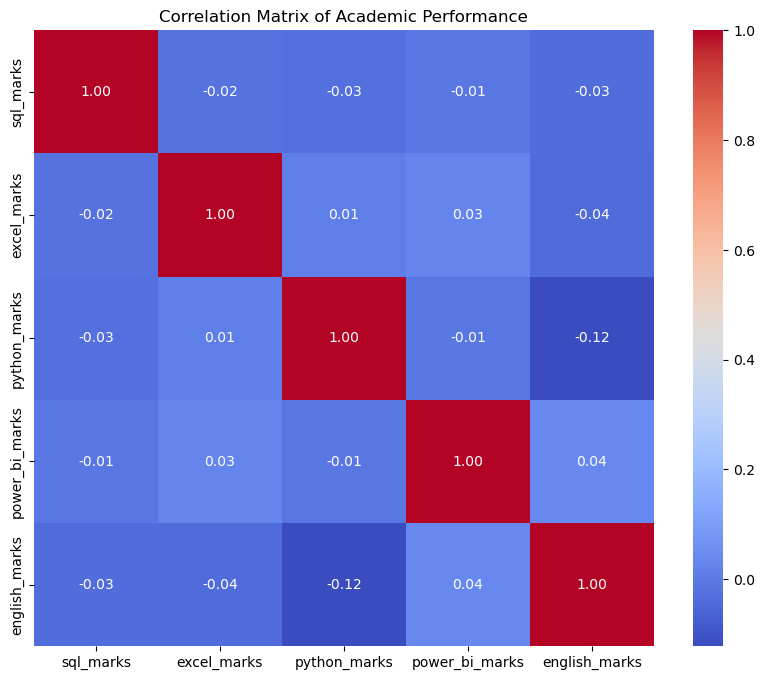

In [868]:
# Plotting correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Academic Performance')
plt.show()